In [18]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tqdm import tqdm
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pandas as pd

In [19]:
import os

def load_images_from_folder(folder):
    images_id = []
    for filename in tqdm(os.listdir(folder)):
        if filename.endswith(".jpg"):
            images_id.append(filename)
    return  images_id

In [ ]:
from PIL import Image 

folder = "../data/raw_data/example_image/"
images_id = load_images_from_folder(folder)
file_truth = "../data/raw_data/example_ground_truth.csv"
df_truth = pd.read_csv(file_truth)
df = df_truth.drop(["seborrheic_keratosis"],axis=1)

for img_id in tqdm(images_id):
    id_ = img_id.split(".")[0]
    cancer = df.loc[df['image_id'] == id_]
    cancer = int(cancer["melanoma"])
    picture = Image.open(folder+img_id)  
    if cancer == 0:
        picture.save("../data/fun_ml/no_c/"+img_id) 
    else:
        picture.save("../data/fun_ml/c/"+img_id) 

# ML part
Follows the tutorial from https://www.tensorflow.org/tutorials/images/classification

# Create a dataset

In [20]:
batch_size = 32
img_height = 180
img_width = 180
folder = "../data/fun_ml"
train_ds = tf.keras.utils.image_dataset_from_directory(
  folder,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.


In [21]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  folder,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2000 files belonging to 2 classes.
Using 400 files for validation.


In [22]:
class_names = train_ds.class_names
print(class_names)

['c', 'no_c']


# Create the model

In [23]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# Compile the model

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Model summary

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

# Train the model

In [26]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
50/50 [==============================] - 99s 2s/step - loss: 0.5539 - accuracy: 0.8087 - val_loss: 0.4693 - val_accuracy: 0.8275
Epoch 2/10
50/50 [==============================] - ETA: 0s - loss: 0.4800 - accuracy: 0.8112

2022-04-07 16:00:41.359086: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 254 of 256
2022-04-07 16:00:41.589411: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


50/50 [==============================] - 98s 2s/step - loss: 0.4800 - accuracy: 0.8112 - val_loss: 0.4509 - val_accuracy: 0.8275
Epoch 3/10
50/50 [==============================] - 89s 2s/step - loss: 0.4743 - accuracy: 0.8119 - val_loss: 0.5147 - val_accuracy: 0.8275
Epoch 4/10
50/50 [==============================] - 90s 2s/step - loss: 0.4725 - accuracy: 0.8131 - val_loss: 0.4405 - val_accuracy: 0.8275
Epoch 5/10
50/50 [==============================] - 92s 2s/step - loss: 0.4542 - accuracy: 0.8150 - val_loss: 0.4553 - val_accuracy: 0.8275
Epoch 6/10
50/50 [==============================] - 92s 2s/step - loss: 0.4482 - accuracy: 0.8181 - val_loss: 0.4962 - val_accuracy: 0.8275
Epoch 7/10
50/50 [==============================] - 91s 2s/step - loss: 0.4440 - accuracy: 0.8225 - val_loss: 0.4610 - val_accuracy: 0.8350
Epoch 8/10
50/50 [==============================] - 87s 2s/step - loss: 0.4279 - accuracy: 0.8244 - val_loss: 0.4757 - val_accuracy: 0.8225
Epoch 9/10
50/50 [=============

# Visualize training results


[0.8274999856948853, 0.8274999856948853, 0.8274999856948853, 0.8274999856948853, 0.8274999856948853, 0.8274999856948853, 0.8349999785423279, 0.8224999904632568, 0.8174999952316284, 0.824999988079071]


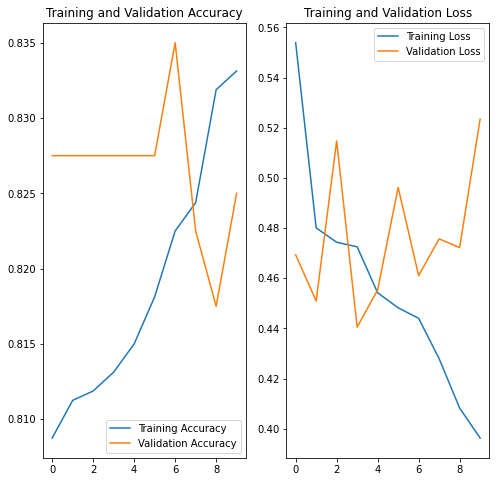

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print(val_acc)
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Overfitting
## Data augmentation

In [28]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

## Dropout

In [29]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## Compile and train the model

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [32]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
50/50 [==============================] - 98s 2s/step - loss: 0.5506 - accuracy: 0.8012 - val_loss: 0.4546 - val_accuracy: 0.8275
Epoch 2/15
50/50 [==============================] - 95s 2s/step - loss: 0.4830 - accuracy: 0.8087 - val_loss: 0.4508 - val_accuracy: 0.8275
Epoch 3/15
50/50 [==============================] - 96s 2s/step - loss: 0.4843 - accuracy: 0.8100 - val_loss: 0.4687 - val_accuracy: 0.8275
Epoch 4/15
50/50 [==============================] - 95s 2s/step - loss: 0.4768 - accuracy: 0.8100 - val_loss: 0.4551 - val_accuracy: 0.8300
Epoch 5/15
50/50 [==============================] - 96s 2s/step - loss: 0.4797 - accuracy: 0.8125 - val_loss: 0.4812 - val_accuracy: 0.8275
Epoch 6/15
50/50 [==============================] - 112s 2s/step - loss: 0.4883 - accuracy: 0.8125 - val_loss: 0.4412 - val_accuracy: 0.8250
Epoch 7/15


2022-04-07 16:22:54.299739: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 253 of 256
2022-04-07 16:22:54.553126: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


50/50 [==============================] - 95s 2s/step - loss: 0.4740 - accuracy: 0.8138 - val_loss: 0.4475 - val_accuracy: 0.8275
Epoch 8/15
50/50 [==============================] - 91s 2s/step - loss: 0.4864 - accuracy: 0.8138 - val_loss: 0.4485 - val_accuracy: 0.8300
Epoch 9/15
50/50 [==============================] - 87s 2s/step - loss: 0.4784 - accuracy: 0.8131 - val_loss: 0.4546 - val_accuracy: 0.8300
Epoch 10/15
50/50 [==============================] - 88s 2s/step - loss: 0.4724 - accuracy: 0.8131 - val_loss: 0.4577 - val_accuracy: 0.8300
Epoch 11/15
50/50 [==============================] - 109s 2s/step - loss: 0.4694 - accuracy: 0.8131 - val_loss: 0.4526 - val_accuracy: 0.8300
Epoch 12/15
50/50 [==============================] - 98s 2s/step - loss: 0.4676 - accuracy: 0.8138 - val_loss: 0.4634 - val_accuracy: 0.8200
Epoch 13/15
50/50 [==============================] - 90s 2s/step - loss: 0.4682 - accuracy: 0.8125 - val_loss: 0.4413 - val_accuracy: 0.8275
Epoch 14/15
50/50 [=======

## Visualize training results

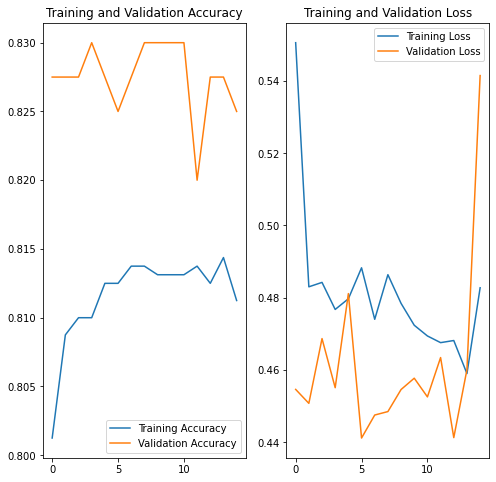

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Predict on new data

In [34]:

# if image from web
url = "https://boernenesverden.dk/wp-content/uploads/2019/11/Moderm%C3%A6rker-hos-b%C3%B8rn-370x246.jpg" # should not be image from training data
path = tf.keras.utils.get_file('img', origin=url)

# if image on pc
# path = "../data/raw_data/example_image/ISIC_0001769.jpg" # should not be image from training dataset

img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to no_c with a 62.57 percent confidence.
